In [37]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('pasta_cooked.csv', delimiter=';')
df['ratio'] = df['m1'] / df['m0']
df.head()

,date,type,m0,t,m1,protocol,ratio
0,15.10.25,e,163,13,322,normal,1.975460
1,17.10.25,s,200,9,445,normal,2.225000
2,21.10.25,e,168,13,330,normal,1.964286
3,24.10.25,s,200,9,452,normal,2.260000
4,26.10.25,s,150,9,328,normal,2.186667


In [39]:
pasta_pal= {
    'spaghetti': "#d28ff9",
    'elicoidali': "#78c7ee",
    'mafalde': "#faab34",
    'fusilli': "#7ff9ae",
    'farfalle': "#f882b9",
}

pasta_pal_light = {
    'spaghetti': '#e4c1f9',
    'elicoidali': '#a9def9',
    'mafalde': "#fcdcbd",
    'fusilli': '#d0f4de',
    'farfalle': '#ff99c8',
}

In [40]:
pasta_dict = {
    's': 'spaghetti',
    'e': 'elicoidali',
    'm': 'mafalde'
}

df['pasta'] = df['type'].copy()
df['pasta'] = df['type'].map(pasta_dict)

df.head()

,date,type,m0,t,m1,protocol,ratio,pasta
0,15.10.25,e,163,13,322,normal,1.975460,elicoidali
1,17.10.25,s,200,9,445,normal,2.225000,spaghetti
2,21.10.25,e,168,13,330,normal,1.964286,elicoidali
3,24.10.25,s,200,9,452,normal,2.260000,spaghetti
4,26.10.25,s,150,9,328,normal,2.186667,spaghetti


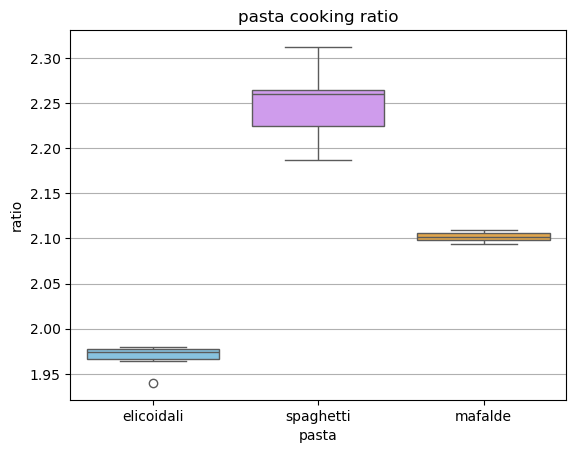

In [41]:
sns.boxplot(
    data = df,
    x = 'pasta',
    hue = 'pasta',
    y = 'ratio',
    palette=pasta_pal
)

#plt.ylim(0,2.5)

plt.grid(axis='y')
plt.title('pasta cooking ratio');

the elicoidali outlier is the time measurement

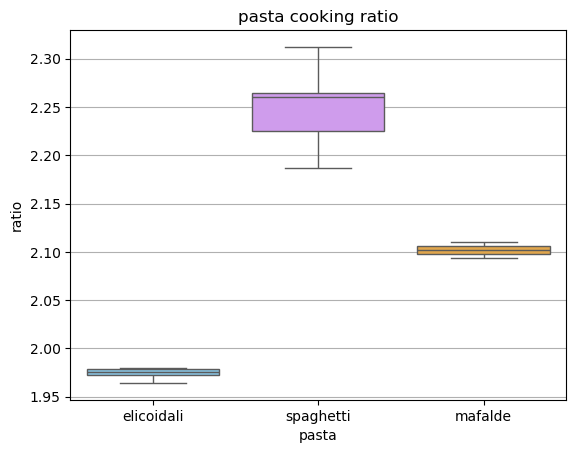

In [42]:
sns.boxplot(
    data = df.loc[df['protocol'] == 'normal'],
    x = 'pasta',
    hue = 'pasta',
    y = 'ratio',
    palette=pasta_pal
)

#plt.ylim(0,2.5)

plt.grid(axis='y')
plt.title('pasta cooking ratio');

In [43]:
ratio_df = (
    df.loc[df['protocol'] == 'normal']
    .groupby('type')['ratio']
    .mean()
)

ratio_df

type
e    1.974169
m    2.101908
s    2.249871
Name: ratio, dtype: float64

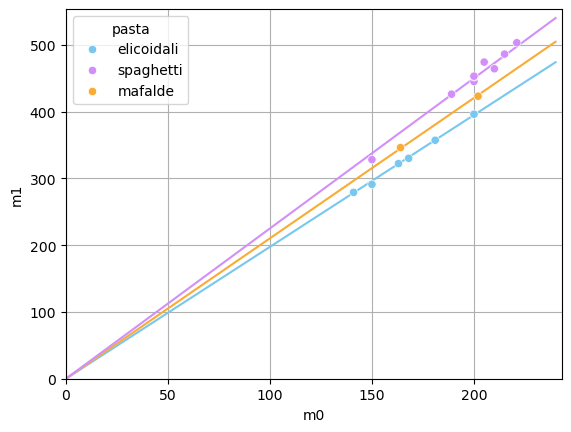

In [44]:
sns.scatterplot(
    data=df,
    x='m0',
    y='m1',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

plt.xlim(0,df['m0'].max()*1.1)
plt.ylim(0,df['m1'].max()*1.1)

plt.grid(zorder=1)


x = np.linspace(0,240)

for t, r in ratio_df.items():
    plt.plot(x, r*x, color=pasta_pal[pasta_dict[t]])


## time

In [45]:
time_df = pd.read_csv('pasta_time.csv', delimiter=';')
time_df.head()

# adding the starting pasta mass to each row
m0_df = (
    time_df
    .groupby('date')
    .first()
    .rename(columns={'p': 'm0'})
    .reset_index()
)
time_df = time_df.merge(m0_df[['date', 'm0']], on='date', how='left')

time_df['ratio'] = time_df['p'] / time_df['m0']
time_df.head()

,date,type,t,p+b,b,p,m0,ratio
0,29.11.25,e,0,246,96,150,150,1.000000
1,29.11.25,e,1,293,96,197,150,1.313333
2,29.11.25,e,3,317,96,221,150,1.473333
3,29.11.25,e,5,337,96,241,150,1.606667
4,29.11.25,e,7,355,96,259,150,1.726667


In [46]:
time_df['pasta'] = time_df['type'].map(pasta_dict)

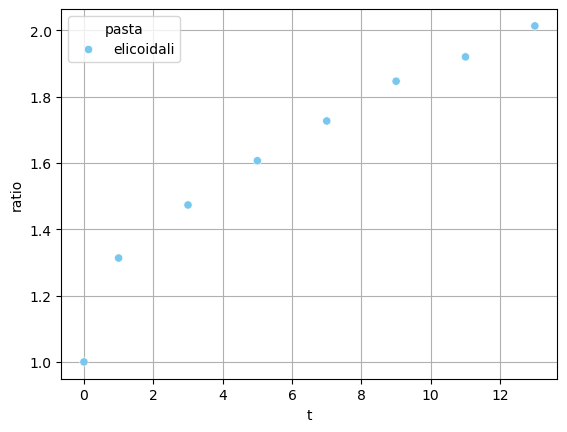

In [47]:
sns.scatterplot(
    data=time_df,
    x='t',
    y='ratio',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

plt.grid(zorder=1)

c:\Users\enric\anaconda3\envs\movie-env\Lib\site-packages\seaborn\regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
c:\Users\enric\anaconda3\envs\movie-env\Lib\site-packages\seaborn\regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
c:\Users\enric\anaconda3\envs\movie-env\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


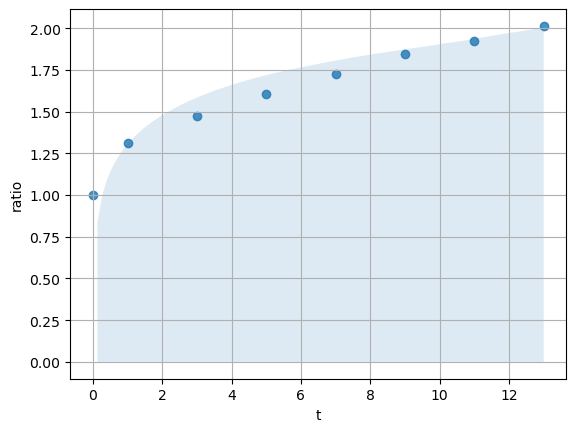

In [ ]:
sns.regplot(
    data=time_df,
    x='t',
    y='ratio',
)



plt.grid(zorder=1)
